/usr/local/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  fhat0 = 1. / (nobs * h) * np.sum(kernel(e / h))
/usr/local/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:203: RuntimeWarning: divide by zero encountered in divide
  fhat0 = 1. / (nobs * h) * np.sum(kernel(e / h))
/usr/local/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:203: RuntimeWarning: invalid value encountered in divide
  fhat0 = 1. / (nobs * h) * np.sum(kernel(e / h))
/usr/local/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  fhat0 = 1. / (nobs * h) * np.sum(kernel(e / h))
/usr/local/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:203: RuntimeWarning: divide by zero encountered in divide
  fhat0 = 1. / (nobs * h) * np.sum(kernel(e / h))
/usr/local/lib/py

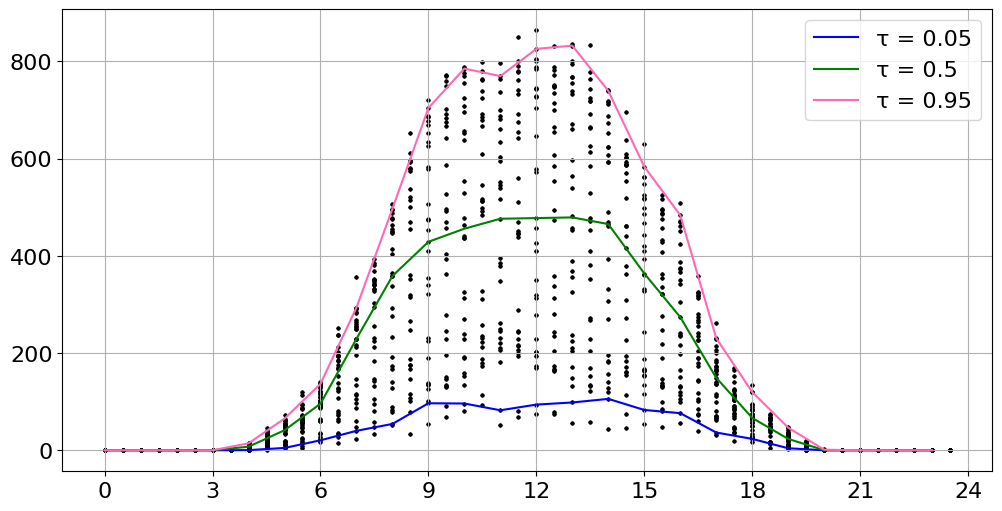

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# "preprocessed_data.csv"を読み込む
df = pd.read_csv("/Users/narutakanomura/Desktop/TEST/PV/preprocessed_data.csv")

# dfの"ref_datetime"と"valid_datetime"を日時型に変換
df["ref_datetime"] = pd.to_datetime(df["ref_datetime"], utc=True)
df["valid_datetime"] = pd.to_datetime(df["valid_datetime"], utc=True)

# "valid_datetime"が2021-06-01 00:00:00+00:00 から 2021-06-30 23:30:00+00:00までのデータを抽出
start_date = pd.to_datetime("2021-06-01 00:00:00", utc=True)
end_date = pd.to_datetime("2021-06-30 23:30:00", utc=True)
df = df[(df["valid_datetime"] >= start_date) & (df["valid_datetime"] <= end_date)]

# "valid_datetime"から時間を抽出
df['hour'] = df['valid_datetime'].dt.hour + df['valid_datetime'].dt.minute / 60

# 散布図をプロット（時間のみをX軸に）
plt.figure(figsize=(12, 6))
#plt.scatter(df["hour"], df["Solar_MWh_credit"], facecolors='none', edgecolors='black', s=30, linewidths=0.5, alpha=0.5)
plt.scatter(df["hour"], df["Solar_MWh_credit"], color='black', s=3, alpha=0.5)


# Quantile regression for the 5th, 50th, and 95th percentiles
percentiles = [0.05, 0.5, 0.95]
percentile_predictions = {p: [] for p in percentiles}
hours = np.arange(24)

# Loop through each hour and perform quantile regression
for hour in hours:
    # Filter the data for the specific hour
    hour_df = df[df['hour'] == hour]
    
    # If there's not enough data for this hour, we can't fit a model
    if hour_df.empty:
        for p in percentiles:
            percentile_predictions[p].append(np.nan)
        continue
    
    # Fit the model for each quantile
    for q in percentiles:
        mod = smf.quantreg('Solar_MWh_credit ~ 1', hour_df)  # No predictors, just an intercept
        res = mod.fit(q=q)
        percentile_predictions[q].append(res.params['Intercept'])
    
# 5%パーセンタイルの線を青色でプロット
plt.plot(hours, percentile_predictions[0.05], label='τ = 0.05', color='blue')

# 50%パーセンタイルの線を緑色でプロット
plt.plot(hours, percentile_predictions[0.5], label='τ = 0.5', color='green')

# 95%パーセンタイルの線をピンク色でプロット
plt.plot(hours, percentile_predictions[0.95], label='τ = 0.95', color='#FF69B4')


# Setting x-axis ticks to display every 3 hours and setting text size
plt.xticks(np.arange(0, 25, 3), fontsize=16)

# Adjusting y-axis label font size
plt.yticks(fontsize=16)

# Showing grid and legend with specified font size
plt.grid(True)
plt.legend(fontsize=16)
plt.show()